In [1]:
        # Iris품종 종류: setosa, versicolor, virginica
        #꽃잎 : PETAL LENGTH, PETAL WIDTH 
        #꽃 받침: SEPAL LENTH, SEPAL WIDTH 
        #iris 품종은 위 두가지 속성으로 명확하게 구분이 가능한 특징을 갖는다.

        #품종별 측정데이터를 이용해 새로 채집한 iris의 품종을 예측하는 ML 모델을 제작할것입니다. 

In [2]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
#sklearn에서는 번트클래스라는것으로 데이터를 제공하는데 이건 dictionary와 같은 개념으로 볼수 있다.

In [4]:
type(iris_dataset)

sklearn.utils.Bunch

In [7]:
iris_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
print("iris_dataset의 키: \n", iris_dataset.keys())

iris_dataset의 키: 
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [6]:
#여기서 dictionary값은 다음과 같이 key값을 이용해서 불러올수 있죠... 근데 양이 많을 테니 그중에서 300글자만 불러옵시다. 
print(iris_dataset['DESCR'][:300] + "\n") 

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal w



In [23]:
print(iris_dataset['target_names'])

['setosa' 'versicolor' 'virginica']


In [8]:
print(iris_dataset['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [9]:
print(iris_dataset['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [10]:
print(iris_dataset['filename'])

D:\Anaconda\envs\lstm-env\lib\site-packages\sklearn\datasets\data\iris.csv


In [11]:
print(iris_dataset['frame'])

None


In [12]:
print("data type:", type(iris_dataset['data']))

data type: <class 'numpy.ndarray'>


In [13]:
print("data size:", iris_dataset['data'].shape) 
#넘파이 배열은 shape으로 크기를 볼수 있죠??
#샘플이 150개고 샘플당 feature가 4개 씩 있다는것임 

data size: (150, 4)


In [14]:
print("data sample:", iris_dataset['data'][:5])

data sample: [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [15]:
#여기서 위의 순서가 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 이다 

In [16]:
print("target type:", type(iris_dataset['target']))

target type: <class 'numpy.ndarray'>


In [17]:
print("target size:",iris_dataset['target'].shape)
#일차원 배열이기 떄문에 (150,)이라고 나온다

target size: (150,)


In [18]:
print("target:\n",iris_dataset['target'])
#이건 setosa, versicolor, virginica를 숫자로 나타낸 데이터임 

target:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [19]:
#성과 측정 
##우리가 할것은 머신러닝 모델을 구축해 새로운 데이터의 품종을 예측하는것입니다. 
##훈련데이터는 평가에 사용할수 없다. (모델이 훈련하는 동안 데이터를 기억한다) 
##이를 위해 scikit-learn의 train_test_split함수를 사용하여 데이터를 나눠준다.
##feature쪽 데이터는 대문자 X를 쓰고 target쪽 레이블은 y로 표현한다.
##feature는 2차원 행렬타입이므로 X대문자로 쓰고, 레이블은 1차원이므로 소문자 y로 쓰는것임  
##train_test_split 함수의 test_size값을 0에서 1사이 값으로 지정 할수 있다. default는 train set= 0.75임
##random_state값은 랜덤 seed(0 ~42) 까지의 값을 주게 된다. 
##random seed 값은 컴퓨터가 내부적으로 구현하고 있는 random함수에 대해 마찬가지로 함수이므로 동일한 입력이 들어오면 
##동일한 출력이 나오게 되는데 이것을 방지하기 위해 random 함수에서는 random seed, 이 seed값을 랜덤으로 설정한다. 
##그러므로 random seed를 고정시키면 어느정도 일정한 값이 나오는 반면 고정시키지 않으면 무작위적으로 값이 나온다. 

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)

In [22]:
print("X_train size:", X_train.shape)
print("y_train size:", y_train.shape)

X_train size: (112, 4)
y_train size: (112,)


In [46]:
print("X_test size:", X_test.shape)
print("y_test size:", y_test.shape)

X_test size: (38, 4)
y_test size: (38,)


In [47]:
##머신러닝 모델을 구축하기 전에 데이터를 조사해야 함(머신러닝이 필요한지, 누락된 정보가 있는지...)

In [23]:
## pip install mglearn, 저자(Andreas C Muller)가 머신러닝을 설명하기 위해 만든 라이브러리 

In [25]:
import pandas as pd 
import mglearn
import matplotlib.pyplot as plt

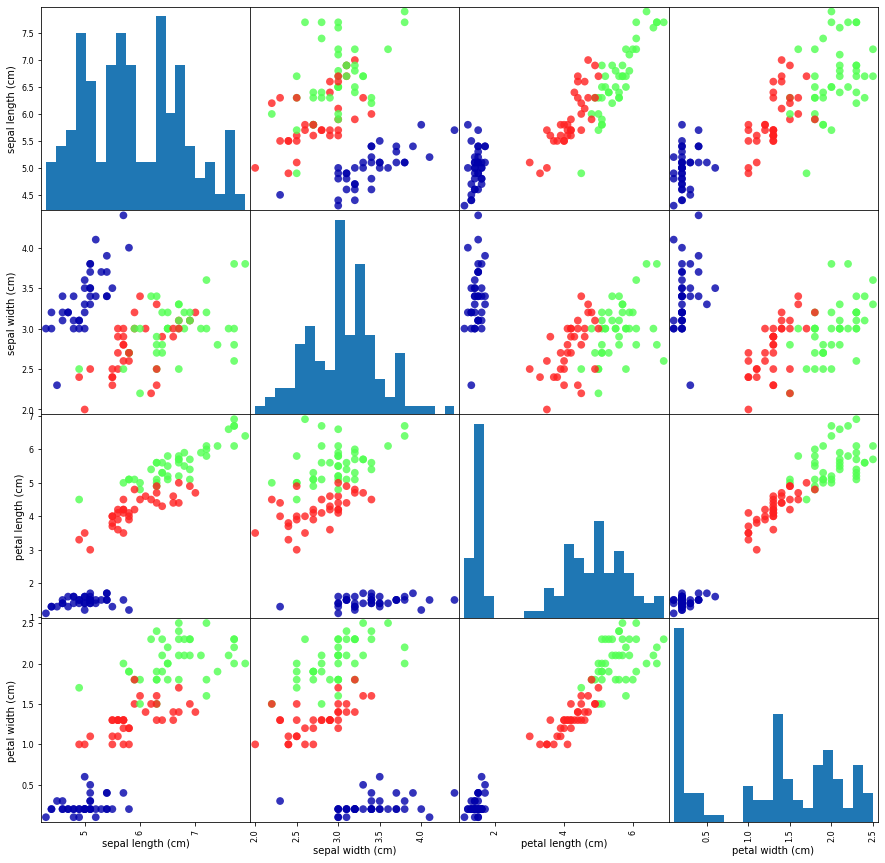

In [26]:
##이렇게 도표를 그려봄으로서 데이터에 상관관계가 있다는 것을 알수 있고 이를 바탕으로 분석을 시작하게 되는것이다. 

iris_dataframe = pd.DataFrame(X_train, columns = iris_dataset.feature_names)
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize = (15,15),
                           marker='o', hist_kwds= {'bins':20}, s= 60, alpha=.8,
                           cmap=mglearn.cm3)
plt.show()

In [27]:
# k-최근접 이웃 알고리즘(k-Nearest Neighbors, k-NN)
# 훈련 데이터를 저장하여 생성 
# 새로운 데이터에 대한 예측은 가장 가까운 훈련 데이터의 포인트를 찾아서 결정 
# 훈련데이터에서 새로운 데이터포인트에 가장 가까운 k개의 이웃을 찾음 
# 위에서 찾은 이웃들의 클래스 중 빈도가 가장 높은 클래스를 예측값으로 사용(자세한 내용은 2장에서), 이 예제에서는 하나의 
# 이웃만 사용한다.
##알고리즘에 대한 설명은 맥북 캡쳐 참조 

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [29]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [55]:
예측하기 
sepal length/ width = 5/2.9, petal length/width = 1/0.2
위 데이터를 넘파이 2차원 배열로 생성 

SyntaxError: invalid syntax (<ipython-input-55-e841a3155d5e>, line 2)

In [30]:
import numpy as np 
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape:", X_new.shape)

X_new.shape: (1, 4)


In [31]:
prediction = knn.predict(X_new)

In [32]:
print("prediction:", prediction)

prediction: [0]


In [33]:
print("target이름:", iris_dataset['target_names'][prediction])

target이름: ['setosa']


# 모델 평가하기 
# test set을 이용하여 모델의 정확도를 계산, 평가하기 

In [34]:
y_pred = knn.predict(X_test)
print("test set 예측값: \n", y_pred)


test set 예측값: 
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [35]:
print("test set 에 대한 정확도: {:.2f}".format(np.mean(y_pred == y_test)))

test set 에 대한 정확도: 0.97


In [65]:
##총정리 
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("test set에 대한 정확도: {:.2f}".format(knn.score(X_test, y_test)))
##score함수를 이용해서 정확도를 간단하게 구할 수 있다. 

test set에 대한 정확도: 0.97


In [68]:
# ## 2.1 분류(Clsassification)와 회귀(Regression)  
# 1. 분류  
# a. 분류는 미리 정의된 가능성 있는 여러 클래스 레이블 중 하나를 예측  
# b. 두 개의 클래스로 분류하는 건 이진 분류(binary classification), 셋 이상의 클래스로 분류하는 건 다중 분류(multiclass classification) 이라 함  

# 2. 회귀  
# a. 연속적인 숫자(실수)를 예측  
# b. 사람의 교육 수준, 나이, 주거지를 바탕으로 연간 소득을 예측 또는 특정 농산물의 올 해 수확량 예측  
# c. 분류문제와 달리 회귀문제에서는 출력값의 작은 차이는 문제가 되지 않음
###작은 차이가 문제가 되지 않는다는것은 ... 분류문제에서는 작은 차이가 다른 카테고리를 의미하므로 작은 차이도 중요하다. 

# 2.2 일반화, 과대적합, 과소적합 
# 지도학습에서 훈련 데이터로 학습한 모데일이 훈련 데이터와 특성이 같다면 처음보는 
# 새로운 데이터가 주어져도 정확히 예측할 수 있음 

# 모델이 처음 보는 데이터에 대해 정확하게 예측할 수 있다면 이를 훈련세트에서 테스트 세트로 일반화(generalization)
# 되었다고 함

# 보유하고 있는 모든 정보를 이용해 만든 복잡한 모델은 훈련 세트에만 최적화 되어 새로운 데이터에 일반화 되기 어렵다. 
# 이를 과대 적합(overfitting)이라고 함

# 모델이 너무 간단하면 데이터의 다양성을 잡아내지 못하고 정확도도 떨어진다. 
# 이를 과소적합(underfitting)이라고 한다. 

# 모델이란 수학적 알고리즘의 표현식이다. 
# 다음 그림과 같이 일반화 성능이 최대치가 되는 최적점에 있는 모델을 찾아야 한다. 
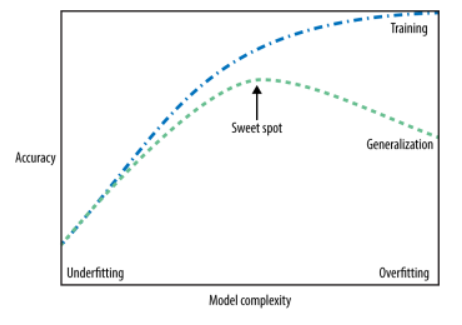


## 2.3 지도 학습 알고리즘 
1.예제에 사용할 데이터 셋 

a. forge 데이터셋은 인위적으로 만든 이진 분류 데이터셋 feature 2개 target 1개

x축은 첫번째 특성, y축은 두번째 특성으로 그래프 작성

In [36]:
import mglearn 
import matplotlib.pyplot as plt 

X, y = mglearn.datasets.make_forge()
print(X)
print(y)

[[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]
 [ 8.30988863  4.80623966]
 [11.93027136  4.64866327]
 [ 9.67284681 -0.20283165]
 [ 8.34810316  5.13415623]
 [ 8.67494727  4.47573059]
 [ 9.17748385  5.09283177]
 [10.24028948  2.45544401]
 [ 8.68937095  1.48709629]
 [ 8.92229526 -0.63993225]
 [ 9.49123469  4.33224792]
 [ 9.25694192  5.13284858]
 [ 7.99815287  4.8525051 ]
 [ 8.18378052  1.29564214]
 [ 8.7337095   2.49162431]
 [ 9.32298256  5.09840649]
 [10.06393839  0.99078055]
 [ 9.50048972 -0.26430318]
 [ 8.34468785  1.63824349]
 [ 9.50169345  1.93824624]
 [ 9.15072323  5.49832246]
 [11.563957    1.3389402 ]]
[1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]


D:\Anaconda\envs\lstm-env\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [70]:
X.shape

(26, 2)

In [71]:
y.shape

(26,)

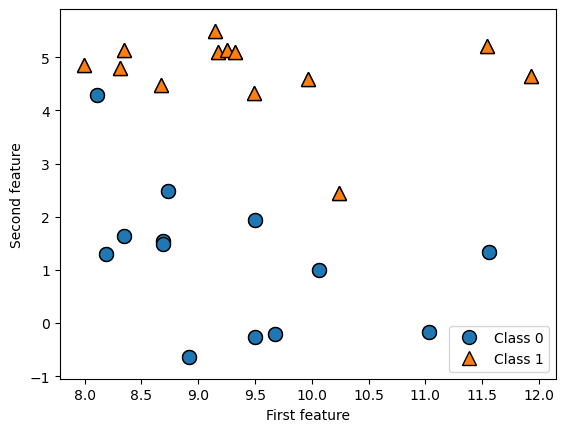

X.shape: (26, 2)


In [74]:
mglearn.discrete_scatter(X[:, 0], X[:,1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()
print("X.shape:", X.shape)

## b. 회귀 분석에 사용 할 wave dateset

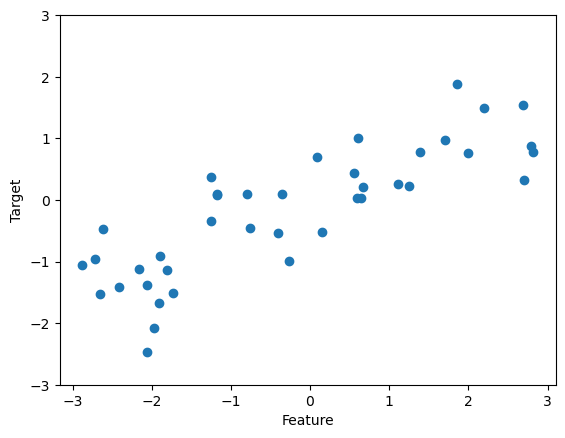

In [76]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")
plt.show()

## c.scikit-learn 
에 들어있는 실제 데이터셋 사용 
유방암 종양의 임상 데이터를 기록해 놓은 위스콘신 유방암 데이터셋 (cancer)
각 종양은 양성(benign)과 악성(malignant)로 레이블 되어있음
조직데이터를 기반으로 종양이 악성인지를 예측하도록 학습하는것이 과제 

In [37]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n", cancer.keys())

cancer.keys(): 
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [38]:
print("유방암 데이터의 형태:", cancer.data.shape)

유방암 데이터의 형태: (569, 30)


In [39]:
print("유방암 target 형태:", cancer.target.shape)

유방암 target 형태: (569,)


In [40]:
print("target_names:", cancer.target_names.shape)

target_names: (2,)


In [41]:
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [42]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [43]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [44]:
import numpy as np 
print("클래스별 샘플 수:{} \n".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target)) } ))

클래스별 샘플 수:{'malignant': 212, 'benign': 357} 



In [95]:
print("feature names: \n {}".format(cancer.feature_names))

feature names: 
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [96]:
print(cancer.data[0])

[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]


d.또 하나의 데이터 셋 
보스턴 주택가격 데이터 셋 
범죄율, 찰스강 인접도, 고속도로 접근성 등의 정보를 이용해 1970년대 보스턴 주변의 주택 평균 가격을 예측 
이 데이터 셋에는 샘플 506개 feature 13개 

In [97]:
from sklearn.datasets import load_boston
boston = load_boston()
print("shape:", boston.data.shape)

shape: (506, 13)


이 데이터셋에는 13개의 입력 feature 뿐 아니라 feature 끼리 곱하여 의도적으로 확장할 수 있다 
이러한 방법을 특성공학 feature engineering이라 한다. 

In [98]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape:", X.shape)
#mglearn을 통해서 
#feature가 늘어난것을 확인할 수 있음 

X.shape: (506, 104)


## 2.4 k-nn
 k-nn은 가장 가까운 훈련 데이터 샘플을 최근접 이웃으로 찾아 예측에 사용한다. 

mglearn.plots.plot_knn_classification(n_neighbors=1)
plt.show()

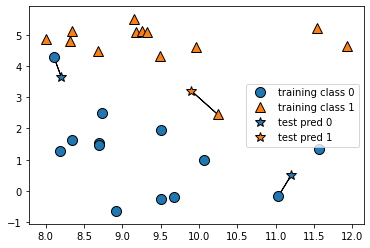

In [45]:
mglearn.plots.plot_knn_classification(n_neighbors=1)
plt.show()



D:\Anaconda\envs\python-env\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


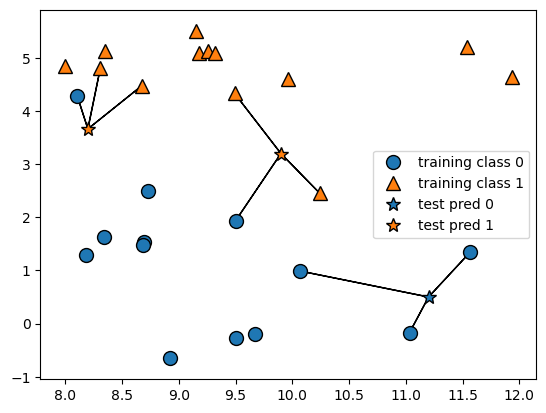

In [102]:
mglearn.plots.plot_knn_classification(n_neighbors=3)
plt.show()

##만약 테스트데이터를 3개 준경우 
## 좌 상단의 점의 색깔이 바뀌었다 => 클래스가 바뀜 

In [103]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

D:\Anaconda\envs\python-env\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [106]:
X_train.shape

(19, 2)

In [111]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [112]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [114]:
print("Test set prediction", clf.predict(X_test))

Test set prediction [1 0 1 0 1 0 0]


In [115]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


## KNeighborCLassifier 분석 
2차원 데이터셋이므로 가능한 모든 테스트 포인트의 예측을 xy평면에 그려본다 
각 데이터 포인트가 속한 클래스에 따라 평면에 색을 칠하여 결정 경계(decision boundary)를 확인한다. 
다음은 이웃이 하나, 셋, 아홉개일때의 결정 경계를 보여준다. 

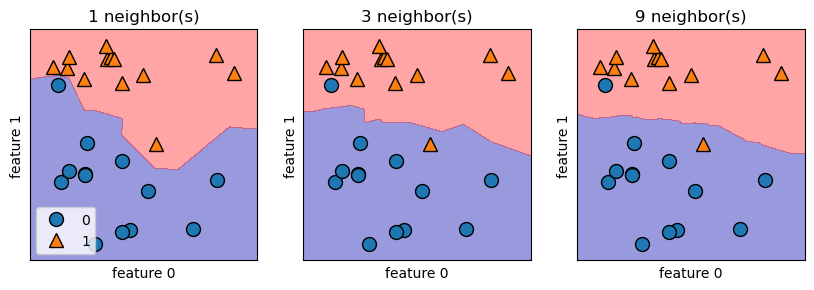

In [116]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
    
axes[0].legend(loc=3)
plt.show()

In [117]:
##이웃을 하나 선택했을 떄는 결정 경계가 훈련 데이터에 가깝게 따라간다. 

In [118]:
## 이웃의 수를 늘릴 수록 결정 경계는 더 부드러워짐, 부드러운 경계는 더 단순한 모델을 의미한다. 

In [119]:
##이웃을 적게 사용하면 모델의 복잡도가 증가 Overfitting 많이 사용하면 복잡도는 감소 Underfitting 

In [120]:
##훈련 데이터 전체 수를 이웃의 수로 지정하는 극단적인 경우, 모든 테스트 포인트가 같은 이웃을 가지므로 테스트 포인트에
# 대한 예측은 모두 같은 값이 나옴 
# 즉 훈련 세트에서 가장 많은 데이터 포인트를 가진 클래스가 예측값이 된다. 

In [121]:
###그렇다면 neighbor의 갯수를 몇개로 정해야 하냐하는 문제가 있는데 
###이는 정해진 공식이 없다 보통 2~3개정도로 지정해서 분석을하는게 관례다. 

In [122]:

#모델의 복잡도와 일반화 사이의 관계를 입증해봄 
#실제 데이터인 유방암 데이터셋을 사용해서 
#훈련 세트와 테스트 세트로 나눈다 
#이웃의 수를 달리하면서 훈련세트와 테스트 세트의 성능을 평가해보자 

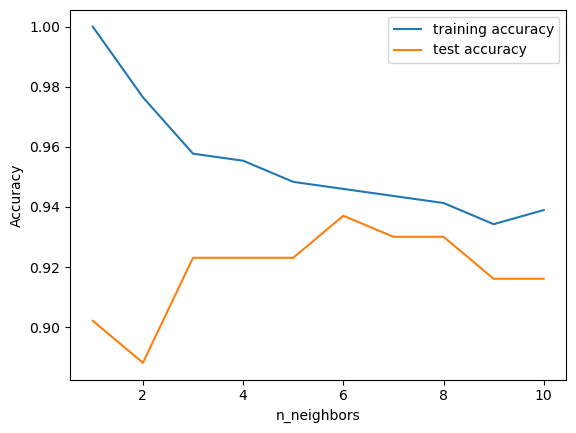

In [123]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, 
                                                   random_state = 66)

##여기서 stratify 는 우리가 가지고 있는 데이터셋에 양성 음성비율이 6:4 로 제공된다고 할때 이걸 train test split할때 
##트레이닝 세트나 테스트셋 어느 한쪽에 양성또는 음성의 비율이 몰릴 수 있다. 떄문에 이걸 나눌때 전체 데이터의 음성양성
##비율을 유지하면서 나눌 수 있도록 한다. 

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors =n_neighbors)
    clf.fit(X_train, y_train) 
    
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
    
    
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

#### Overfitting과 Underfitting 의 특징을 잘보여준다. 
왼쪽이 overfit, 오른쪽이 underfit으로 더 단순한 모델이라는 의미가 된다. 
최근접 이웃의 수가 하나일 때는 훈련 데이터에 대한 예측이 완벽 하지만 
이웃의 수가 늘어나면 모델은 단순해지고 훈련데이터의 정확도도 감소한다. 
이웃을 하나 사용한 테스트 세트의 정확도는 이웃을 많이 사용했을 때보다 낮다. 
그래서 1-NN은 모델을 너무 복잡하게 만든다는 것을 설명하고 있다. 
-반면에 10-NN은 모델이 너무 단순해서 정확도가 떨어지는것을 보여준다.
정확도가 가장 좋을때는 중간정도인 6-NN으로 보여진다. 

## K-Neighbors regression

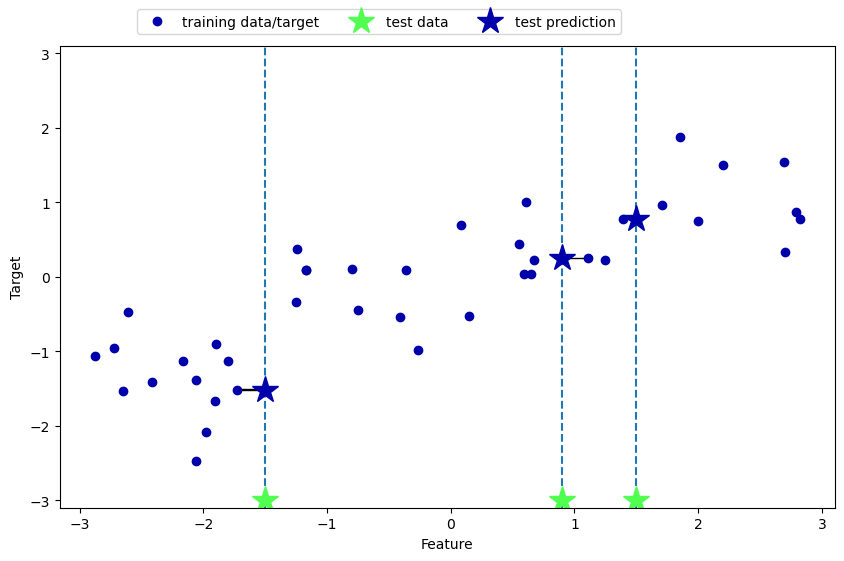

In [124]:
mglearn.plots.plot_knn_regression(n_neighbors=1)
plt.show()

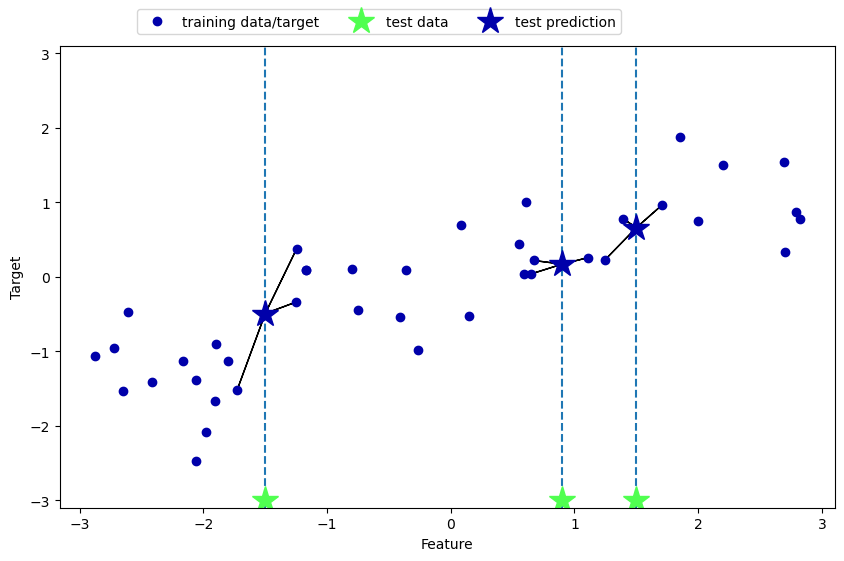

In [125]:
mglearn.plots.plot_knn_regression(n_neighbors=3)
plt.show()
##가 까운 neighbors의 y값을 모두 더해서 다시 그 수만큼 나눠 평균으로 잡는다. 

In [130]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                   random_state = 0)

reg = KNeighborsRegressor(n_neighbors = 3)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [131]:
print("Test set predictions: \n", reg.predict(X_test))

Test set predictions: 
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [132]:
print("Test set score: {:.2f}".format(reg.score(X_test, y_test)))

Test set score: 0.83


##### 회귀문제에서의 score
회귀문제에서는 score를 다르게 하는데..
- 이 메서드는 회귀일 땐 R<sup>2</sup> 값을 반환 :
    R<sup>2</sup> = 1 - ( sigma(y-예측값)<sup>2</sup> / sigma(y-평균)<sup>2</sup> )  
    결정계수라고도 하는 R제곱 값은 회귀 모델에서의 예측의 적합도를 측정한 값, 보통 0과 1사이의 값으로 나온다. 
    1은 예측이 완벽한 경우, 0은 훈련 세트의 출력값인 y_train의 평균만 예측하는 모델의 경우이다.
    
    
    
   R<sup>2</sup> 은 음수가 될 수도 있음, 이 때는 예측과 target이 상반된 경향을 가지는 경우  








## KNeighborsRegression 분석 


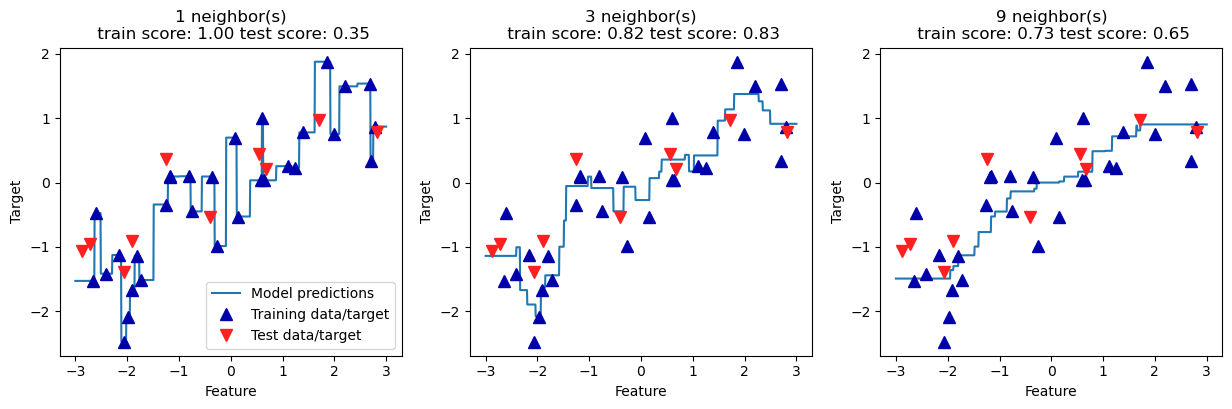

In [134]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
        n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
    
axes[0].legend(["Model predictions", "Training data/target", "Test data/target"], loc="best")
plt.show()

#####  이웃을 하나만 사용할 떄는 훈련 세트의 각 데이터 포인트가 예측에 주는 영향이 커서 예측값이 훈련 데이터 포인트를 
모두 지나간다.


이는 매우 불안정한 예측을 만들어낸다. 
이웃을 많이 사용하면 훈련 데이터에는 잘 안 맞을 수 있지만 더 안정적인 예측을 얻는다 

###  장단점과 매개변수 

일반적으로 KNeighbors 분류기에서 중요한 매개변수는 두개인데 데이터 포인트 사이의 거리를 재는 방법과 이웃의 수가 그것이다. 


실제로 이웃의 수는 3개나 5개 정도로 적을 때 잘 동작하지만 , 이 매개변수는 잘 조정해줘야 한다. 

거리 재는 방법을 고르는 문제는 또 다른 문제인데, 기본적으로 여러 환경에서 잘 동작하는 유클리디안 거리 방식을 사용한다.(metric 매개변수를 사용하여 거리 측정 방식을 변경 할 수 있다.)

K-NN의 장점은 이해하기 매우 쉬운 모델이라는 점과, 많은 조정이 필요없이 자주 좋은 성능을 발휘한다는 점이다. 
그렇기 떄문에 문제 해결시 더 복잡한 알고리즘을 적용하기 전에 먼저 시도 해볼수 있는 좋은 시작점이 되어준다. 

그러나 훈련용 샘플수가 많으면(훈련세트가 커지면) 예측이 느려진다는 단점이 있다. 당연히 모든 훈련포인트에 대해 거리 계산을 해야 하기 떄문에 시간이 많이 걸리는 것이다. 

K-NN알고리즘을 사용할 떄는 데이터 전처리가 매우 중요해서 (모든 특성값들이 같은 스케일을 갖도록 정규화 하는 것이 일반적이다)

수백 개 이상의 많은 feature를 가진 데이터셋에는 잘 동작하지 않는다. 

결론 적으로 K-NN 알고리즘은 이해하긴 쉽지만 예측이 느리고 많은 feature를 처리하는 능력이 부족해서 현업에서는 잘 
쓰이지 않는다는 단점이있다.

그래서 이런 단점들을 보완하기 위해 선형모델 알고리즘이 등장하기 시작했다. 